In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv("../contents/Mall_Customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = customers[["Annual Income (k$)", "Spending Score (1-100)"]].rename(
    columns={"Annual Income (k$)": "income", "Spending Score (1-100)": "ss"})
data

,income,ss
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
#scaling
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data_scaled = mms.fit_transform(data)
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
result = km.fit_predict(data_scaled)
data["result"] = result
data

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,income,ss,result
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,4
197,126,74,1
198,137,18,4


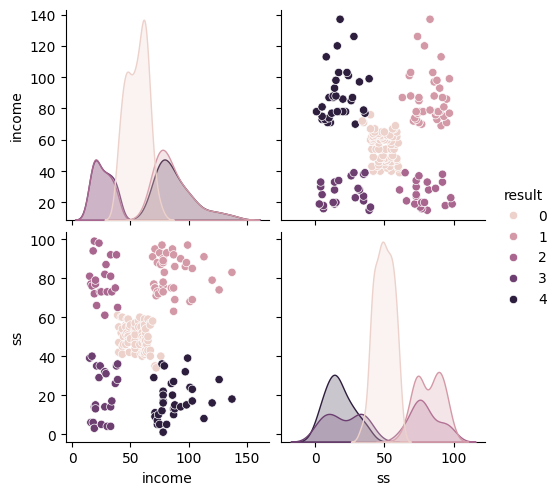

In [5]:
import seaborn as sns

sns.pairplot(data, hue="result")

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


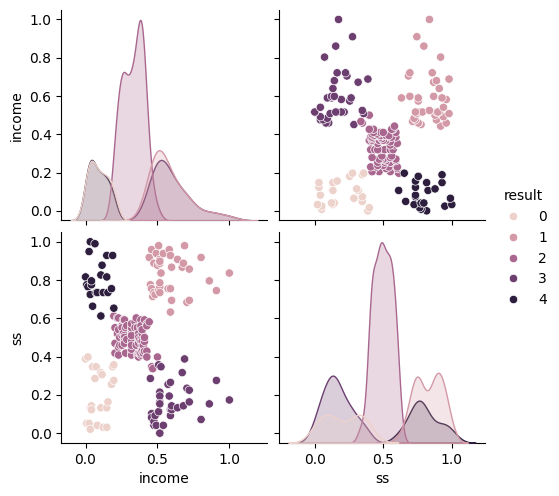

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data_scaled = mms.fit_transform(data)
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
result = km.fit_predict(data_scaled)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled["result"] = result
sns.pairplot(data_scaled, hue="result")